In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from math import sqrt


In [11]:
#Cargar la función para llegar a los CSV divididos
def load_split(seed):
    X_train = pd.read_csv(f'X_train_{seed}.csv')
    X_test = pd.read_csv(f'X_test_{seed}.csv')
    y_train = pd.read_csv(f'y_train_{seed}.csv')
    y_test = pd.read_csv(f'y_test_{seed}.csv')
    
    return X_train, X_test, y_train, y_test

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Gastos   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                         0.40947
Method:                          IRLS   Log-Likelihood:                -1036.0
Date:                Sun, 09 Jun 2024   Deviance:                       434.45
Time:                        20:52:35   Pearson chi2:                     434.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9462
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.96

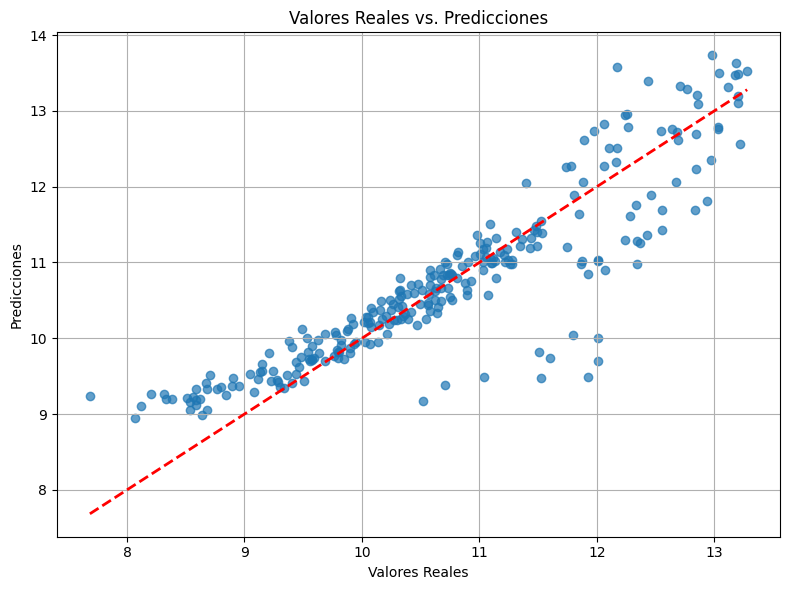

MAE: 0.38564396468355816
MSE: 0.32406565123124886
RMSE: 0.569267644637607
R2 Score: 0.7972978207093567
RMSLE: 0.04912348854740727
MAPE: 3.6119440190591963


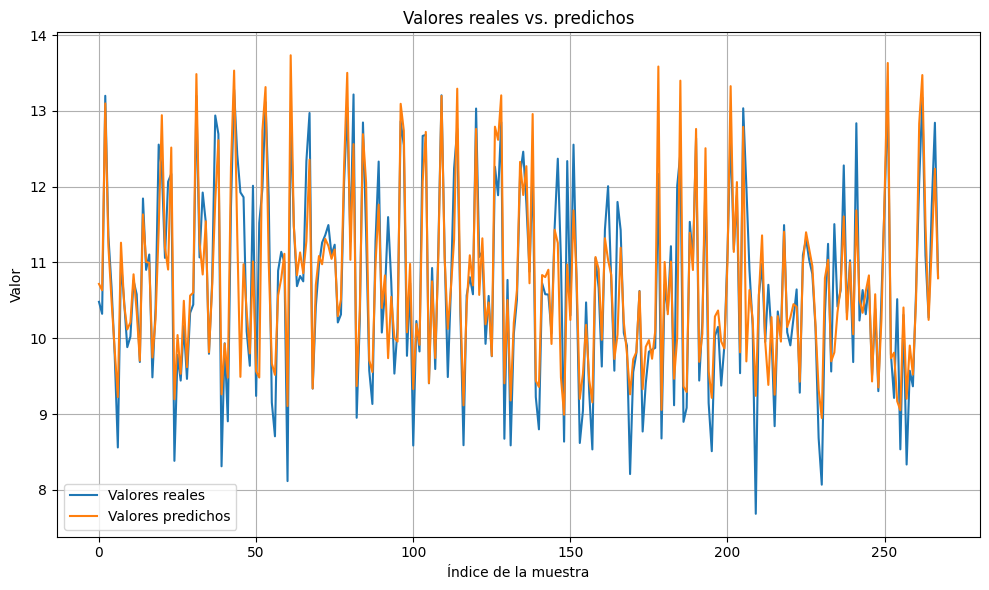

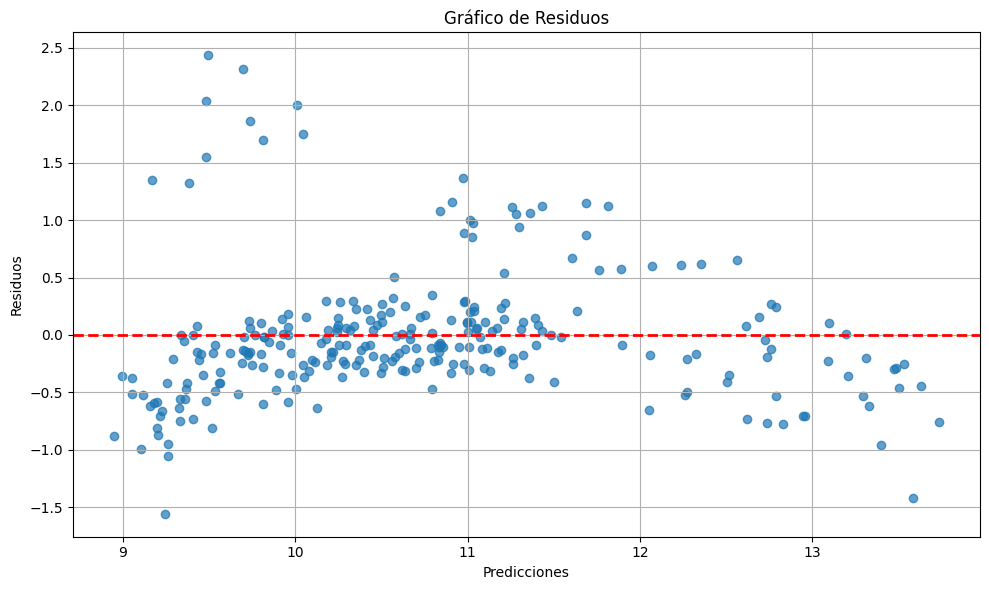

In [14]:
# Cargar una división específica (por ejemplo, la primera división)
X_train, X_test, y_train, y_test = load_split(0)

# Convertir y_train e y_test a series de pandas para asegurar que no haya problemas de tipo
y_train = y_train.squeeze().astype(float)
y_test = y_test.squeeze().astype(float)

# Verificar que y_train e y_test son de tipo float
assert y_train.dtype == float, f"y_train is not float but {y_train.dtype}"
assert y_test.dtype == float, f"y_test is not float but {y_test.dtype}"

# Aplicar One-Hot Encoding a las variables categóricas
categorical_cols = ['Sexo', 'Fumador', 'Region EEUU']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Ajustar y transformar las variables categóricas de X_train
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Transformar las variables categóricas de X_test
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar las variables codificadas con las variables numéricas
X_train = pd.concat([X_train.drop(columns=categorical_cols).reset_index(drop=True), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols).reset_index(drop=True), X_test_encoded_df], axis=1)

# Asegurarse de que todos los tipos de datos sean numéricos
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Añadir una constante para el intercepto
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# GLM Gaussiano
# Iniciar el modelo
model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Realizar las predicciones
y_pred = results.predict(X_test)

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Calcular RMSLE (Root Mean Squared Logarithmic Error)
if (y_test >= 0).all() and (y_pred >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print("RMSLE:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")

# Calcular MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)

# Gráfico de línea de los valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Valores reales")
plt.plot(y_pred, label="Valores predichos")
plt.xlabel("Índice de la muestra")
plt.ylabel("Valor")
plt.title("Valores reales vs. predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular residuos
residuos = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.grid(True)
plt.tight_layout()
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Gastos   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                         0.39393
Method:                          IRLS   Log-Likelihood:                -1015.4
Date:                Sun, 09 Jun 2024   Deviance:                       417.96
Time:                        20:52:50   Pearson chi2:                     418.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9523
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.09

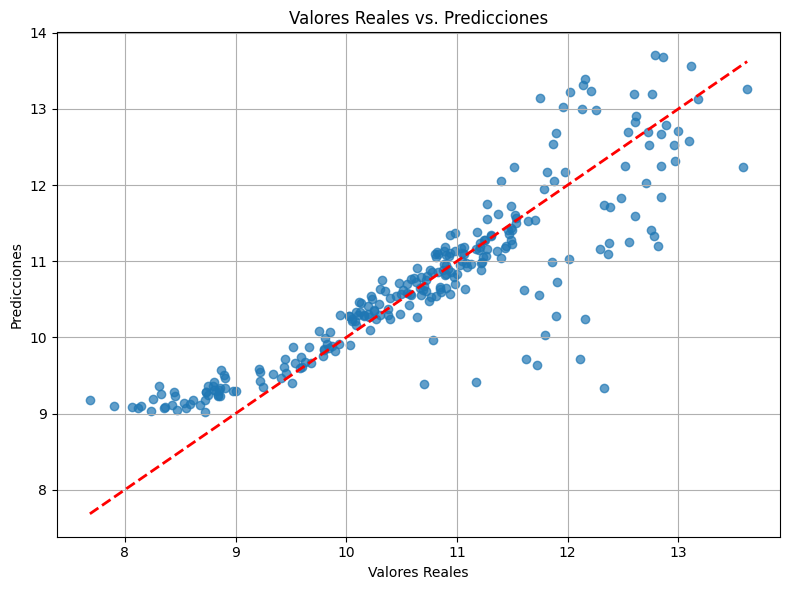

MAE: 0.4144167735584628
MSE: 0.3836129702550097
RMSE: 0.6193649733840376
R2 Score: 0.7677703468338917
RMSLE: 0.05301547186053987
MAPE: 3.8842593392259332


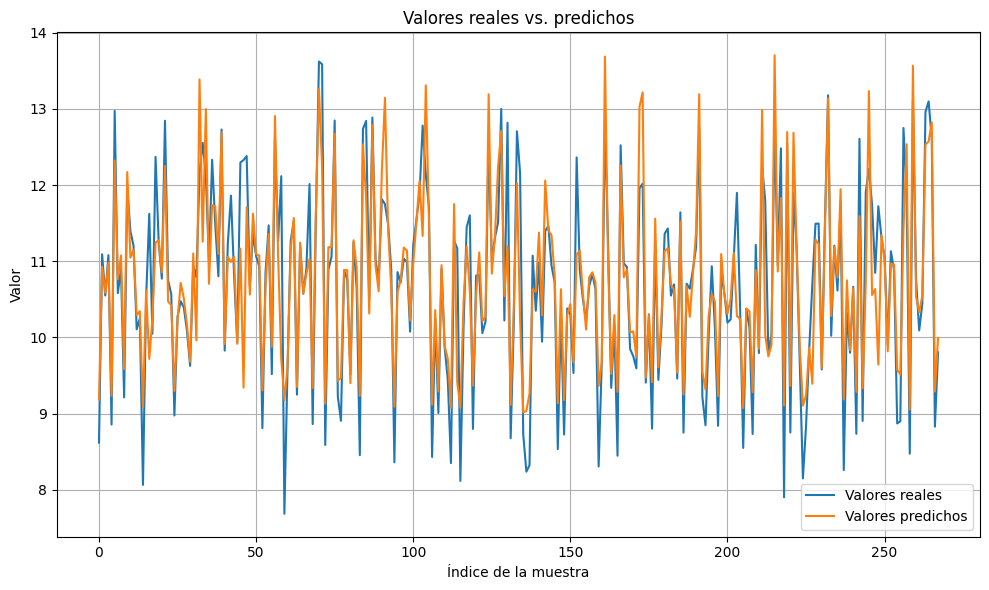

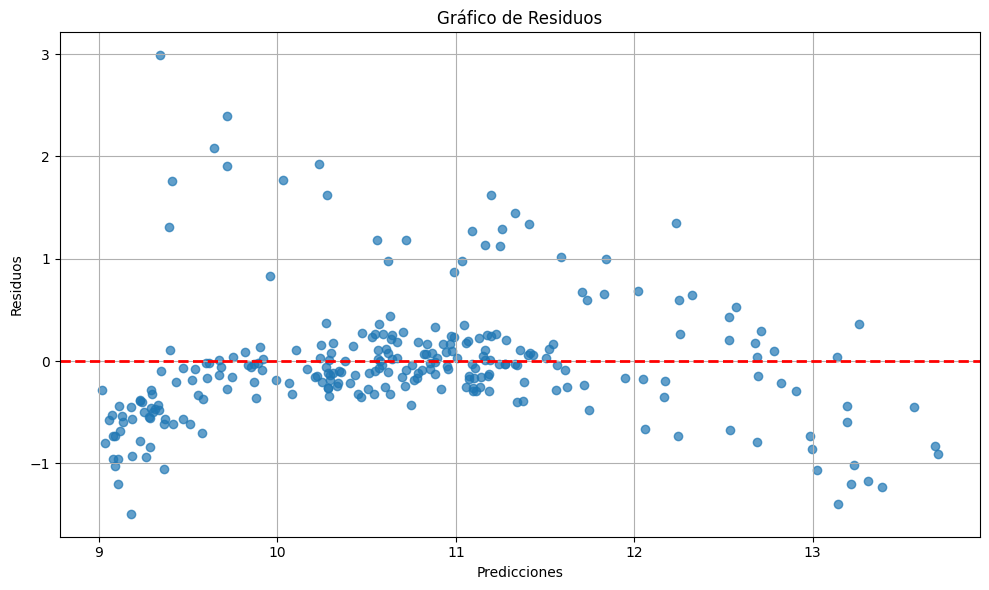

In [16]:
# Cargar una división específica (por ejemplo, la primera división)
X_train, X_test, y_train, y_test = load_split(1)

# Convertir y_train e y_test a series de pandas para asegurar que no haya problemas de tipo
y_train = y_train.squeeze().astype(float)
y_test = y_test.squeeze().astype(float)

# Verificar que y_train e y_test son de tipo float
assert y_train.dtype == float, f"y_train is not float but {y_train.dtype}"
assert y_test.dtype == float, f"y_test is not float but {y_test.dtype}"

# Aplicar One-Hot Encoding a las variables categóricas
categorical_cols = ['Sexo', 'Fumador', 'Region EEUU']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Ajustar y transformar las variables categóricas de X_train
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Transformar las variables categóricas de X_test
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar las variables codificadas con las variables numéricas
X_train = pd.concat([X_train.drop(columns=categorical_cols).reset_index(drop=True), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols).reset_index(drop=True), X_test_encoded_df], axis=1)

# Asegurarse de que todos los tipos de datos sean numéricos
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Añadir una constante para el intercepto
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# GLM Gaussiano
# Iniciar el modelo
model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Realizar las predicciones
y_pred = results.predict(X_test)

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Calcular RMSLE (Root Mean Squared Logarithmic Error)
if (y_test >= 0).all() and (y_pred >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print("RMSLE:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")

# Calcular MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)


# Gráfico de línea de los valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Valores reales")
plt.plot(y_pred, label="Valores predichos")
plt.xlabel("Índice de la muestra")
plt.ylabel("Valor")
plt.title("Valores reales vs. predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular residuos
residuos = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.grid(True)
plt.tight_layout()
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Gastos   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                         0.39130
Method:                          IRLS   Log-Likelihood:                -1011.8
Date:                Sun, 09 Jun 2024   Deviance:                       415.17
Time:                        20:53:12   Pearson chi2:                     415.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9489
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.11

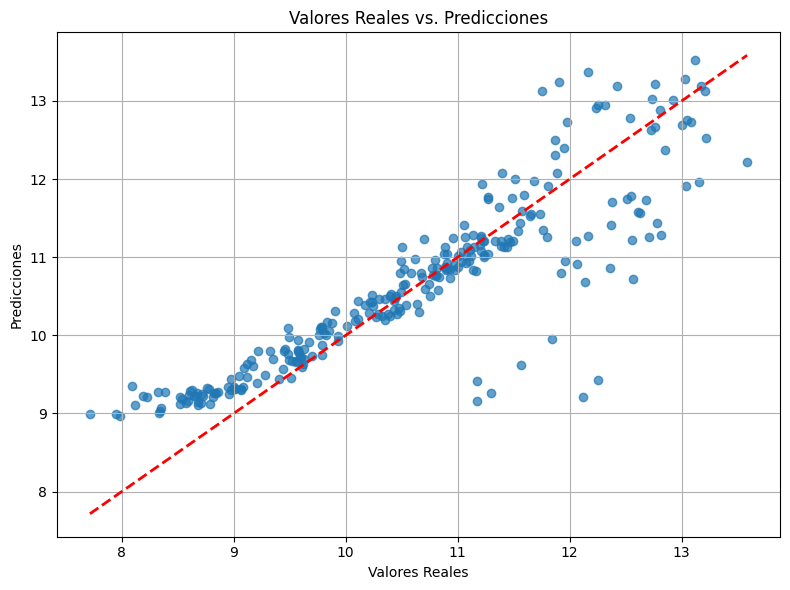

MAE: 0.427087629475946
MSE: 0.3963559758373631
RMSE: 0.6295680867367429
R2 Score: 0.7788325703318278
RMSLE: 0.05427925535241889
MAPE: 4.04236650071208


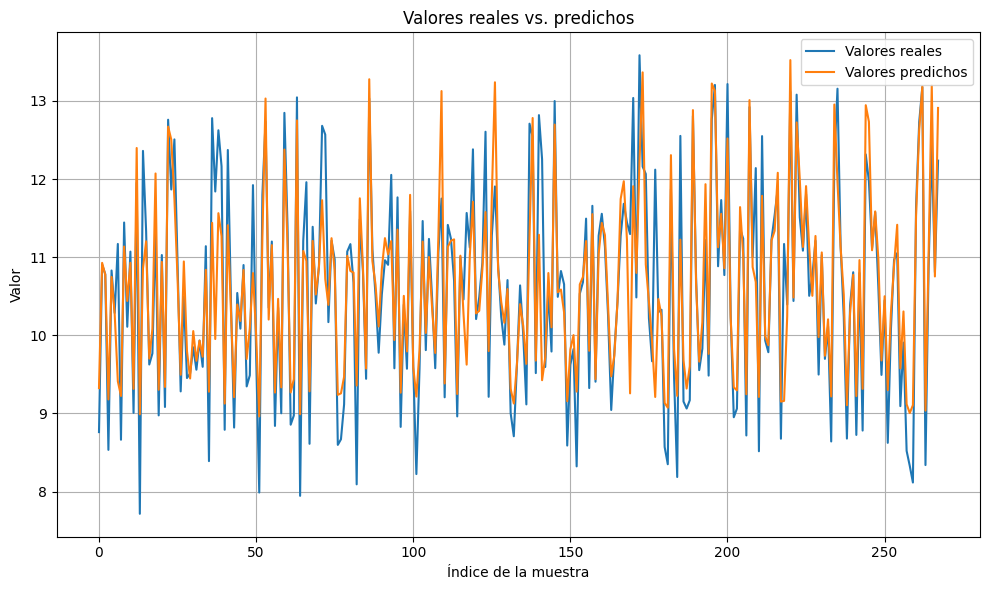

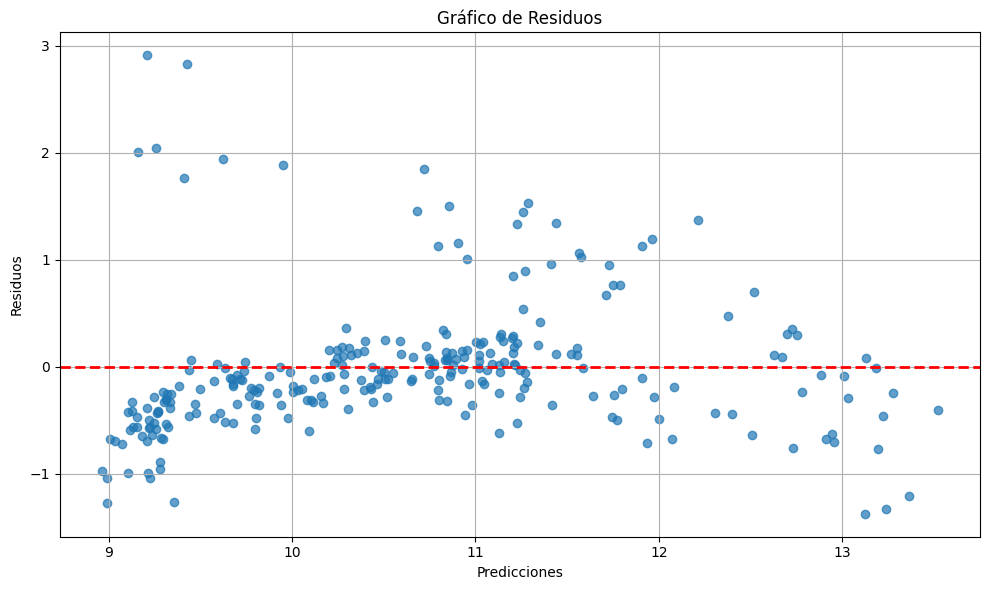

In [17]:
# Cargar una división específica (por ejemplo, la primera división)
X_train, X_test, y_train, y_test = load_split(2)

# Convertir y_train e y_test a series de pandas para asegurar que no haya problemas de tipo
y_train = y_train.squeeze().astype(float)
y_test = y_test.squeeze().astype(float)

# Verificar que y_train e y_test son de tipo float
assert y_train.dtype == float, f"y_train is not float but {y_train.dtype}"
assert y_test.dtype == float, f"y_test is not float but {y_test.dtype}"

# Aplicar One-Hot Encoding a las variables categóricas
categorical_cols = ['Sexo', 'Fumador', 'Region EEUU']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Ajustar y transformar las variables categóricas de X_train
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Transformar las variables categóricas de X_test
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar las variables codificadas con las variables numéricas
X_train = pd.concat([X_train.drop(columns=categorical_cols).reset_index(drop=True), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols).reset_index(drop=True), X_test_encoded_df], axis=1)

# Asegurarse de que todos los tipos de datos sean numéricos
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Añadir una constante para el intercepto
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# GLM Gaussiano
# Iniciar el modelo
model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Realizar las predicciones
y_pred = results.predict(X_test)

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Calcular RMSLE (Root Mean Squared Logarithmic Error)
if (y_test >= 0).all() and (y_pred >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print("RMSLE:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")

# Calcular MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)


# Gráfico de línea de los valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Valores reales")
plt.plot(y_pred, label="Valores predichos")
plt.xlabel("Índice de la muestra")
plt.ylabel("Valor")
plt.title("Valores reales vs. predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular residuos
residuos = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.grid(True)
plt.tight_layout()
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Gastos   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                         0.37335
Method:                          IRLS   Log-Likelihood:                -986.64
Date:                Sun, 09 Jun 2024   Deviance:                       396.12
Time:                        20:53:35   Pearson chi2:                     396.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9617
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.96

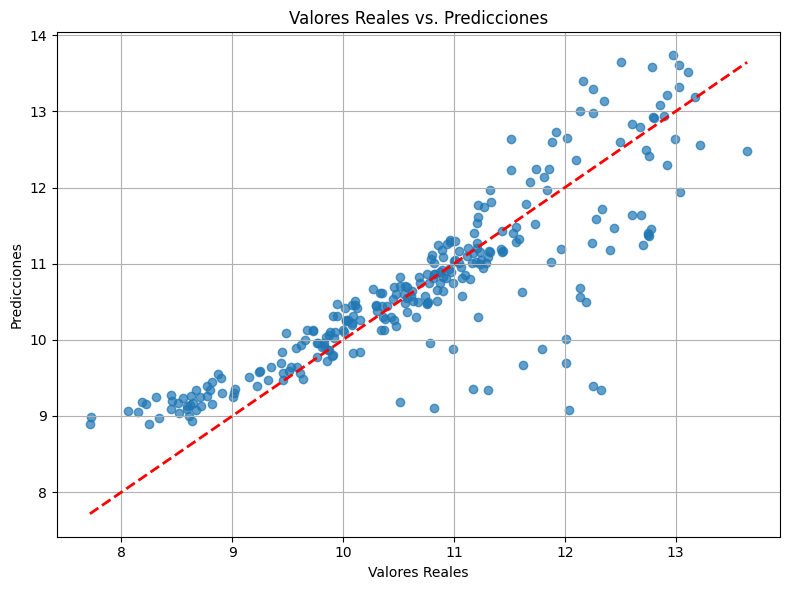

MAE: 0.46057179664291636
MSE: 0.46591874579998305
RMSE: 0.6825824095301483
R2 Score: 0.7186645198192123
RMSLE: 0.058525595744630204
MAPE: 4.277685176853684


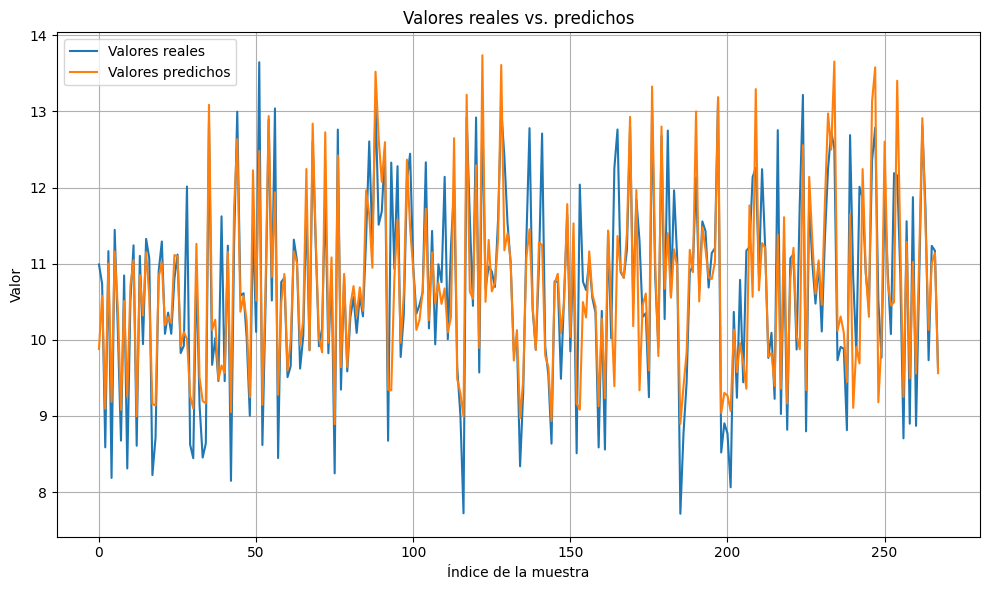

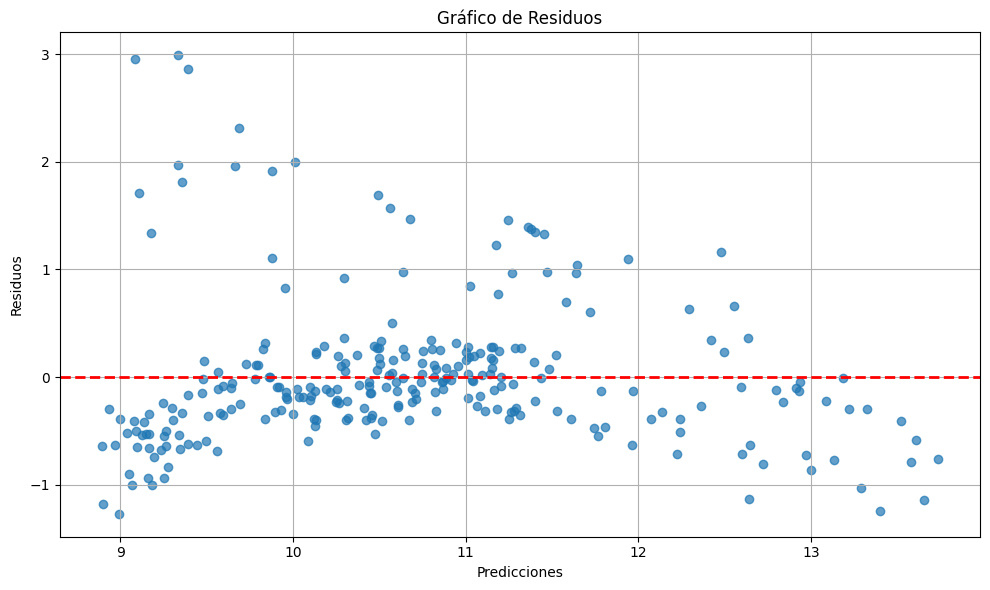

In [18]:
# Cargar una división específica (por ejemplo, la primera división)
X_train, X_test, y_train, y_test = load_split(3)

# Convertir y_train e y_test a series de pandas para asegurar que no haya problemas de tipo
y_train = y_train.squeeze().astype(float)
y_test = y_test.squeeze().astype(float)

# Verificar que y_train e y_test son de tipo float
assert y_train.dtype == float, f"y_train is not float but {y_train.dtype}"
assert y_test.dtype == float, f"y_test is not float but {y_test.dtype}"

# Aplicar One-Hot Encoding a las variables categóricas
categorical_cols = ['Sexo', 'Fumador', 'Region EEUU']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Ajustar y transformar las variables categóricas de X_train
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Transformar las variables categóricas de X_test
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar las variables codificadas con las variables numéricas
X_train = pd.concat([X_train.drop(columns=categorical_cols).reset_index(drop=True), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols).reset_index(drop=True), X_test_encoded_df], axis=1)

# Asegurarse de que todos los tipos de datos sean numéricos
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Añadir una constante para el intercepto
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# GLM Gaussiano
# Iniciar el modelo
model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Realizar las predicciones
y_pred = results.predict(X_test)

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Calcular RMSLE (Root Mean Squared Logarithmic Error)
if (y_test >= 0).all() and (y_pred >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print("RMSLE:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")

# Calcular MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)

# Gráfico de línea de los valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Valores reales")
plt.plot(y_pred, label="Valores predichos")
plt.xlabel("Índice de la muestra")
plt.ylabel("Valor")
plt.title("Valores reales vs. predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular residuos
residuos = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.grid(True)
plt.tight_layout()
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Gastos   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                         0.37913
Method:                          IRLS   Log-Likelihood:                -994.86
Date:                Sun, 09 Jun 2024   Deviance:                       402.26
Time:                        20:53:49   Pearson chi2:                     402.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9609
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.05

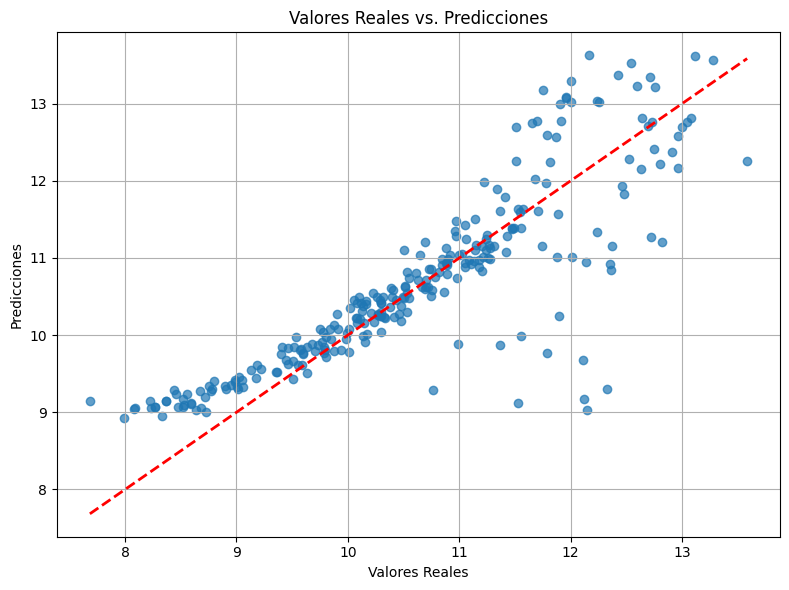

MAE: 0.4373494156133178
MSE: 0.44757929288665227
RMSE: 0.6690136716739444
R2 Score: 0.7167374674427527
RMSLE: 0.057108738714667956
MAPE: 4.084134620918469


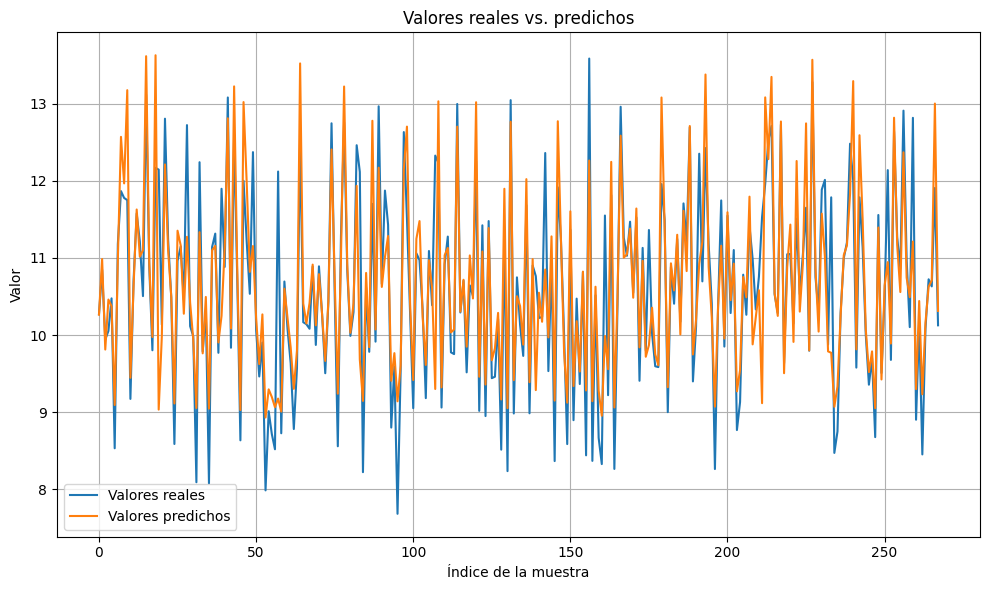

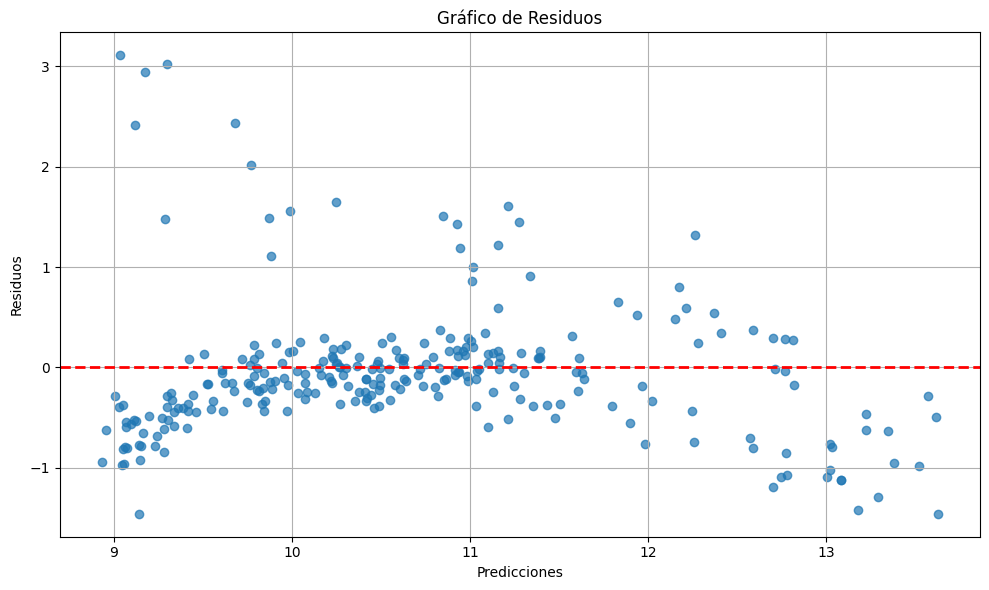

In [19]:
# Cargar una división específica (por ejemplo, la primera división)
X_train, X_test, y_train, y_test = load_split(4)

# Convertir y_train e y_test a series de pandas para asegurar que no haya problemas de tipo
y_train = y_train.squeeze().astype(float)
y_test = y_test.squeeze().astype(float)

# Verificar que y_train e y_test son de tipo float
assert y_train.dtype == float, f"y_train is not float but {y_train.dtype}"
assert y_test.dtype == float, f"y_test is not float but {y_test.dtype}"

# Aplicar One-Hot Encoding a las variables categóricas
categorical_cols = ['Sexo', 'Fumador', 'Region EEUU']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Ajustar y transformar las variables categóricas de X_train
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Transformar las variables categóricas de X_test
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar las variables codificadas con las variables numéricas
X_train = pd.concat([X_train.drop(columns=categorical_cols).reset_index(drop=True), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols).reset_index(drop=True), X_test_encoded_df], axis=1)

# Asegurarse de que todos los tipos de datos sean numéricos
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Añadir una constante para el intercepto
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# GLM Gaussiano
# Iniciar el modelo
model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())

# Ajustar el modelo a los datos
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Realizar las predicciones
y_pred = results.predict(X_test)

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Calcular RMSLE (Root Mean Squared Logarithmic Error)
if (y_test >= 0).all() and (y_pred >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print("RMSLE:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")

# Calcular MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)


# Gráfico de línea de los valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Valores reales")
plt.plot(y_pred, label="Valores predichos")
plt.xlabel("Índice de la muestra")
plt.ylabel("Valor")
plt.title("Valores reales vs. predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular residuos
residuos = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Gastos   No. Observations:                 1070
Model:                            GLM   Df Residuals:                     1061
Model Family:                   Gamma   Df Model:                            8
Link Function:               identity   Scale:                         0.61455
Method:                          IRLS   Log-Likelihood:                -10735.
Date:                Mon, 03 Jun 2024   Deviance:                       279.60
Time:                        20:34:46   Pearson chi2:                     652.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5867
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3337.4686    207.078     16.117      0.0

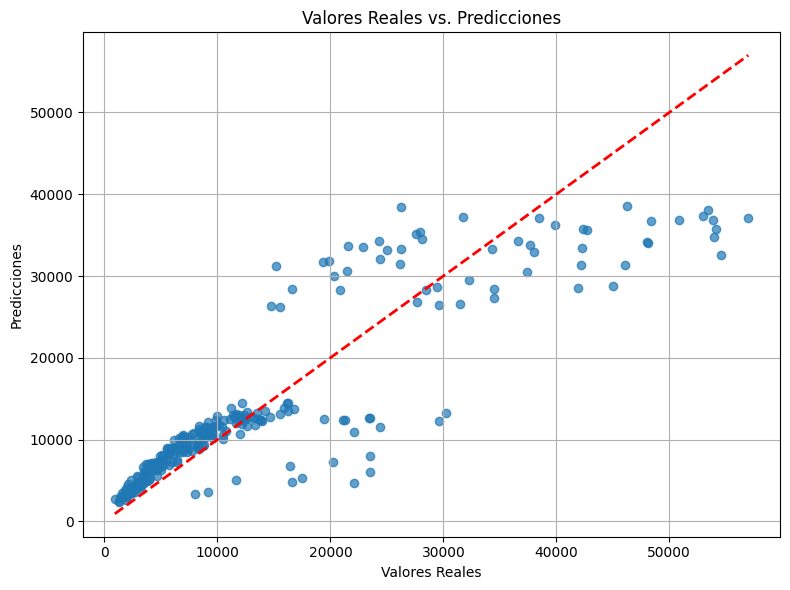

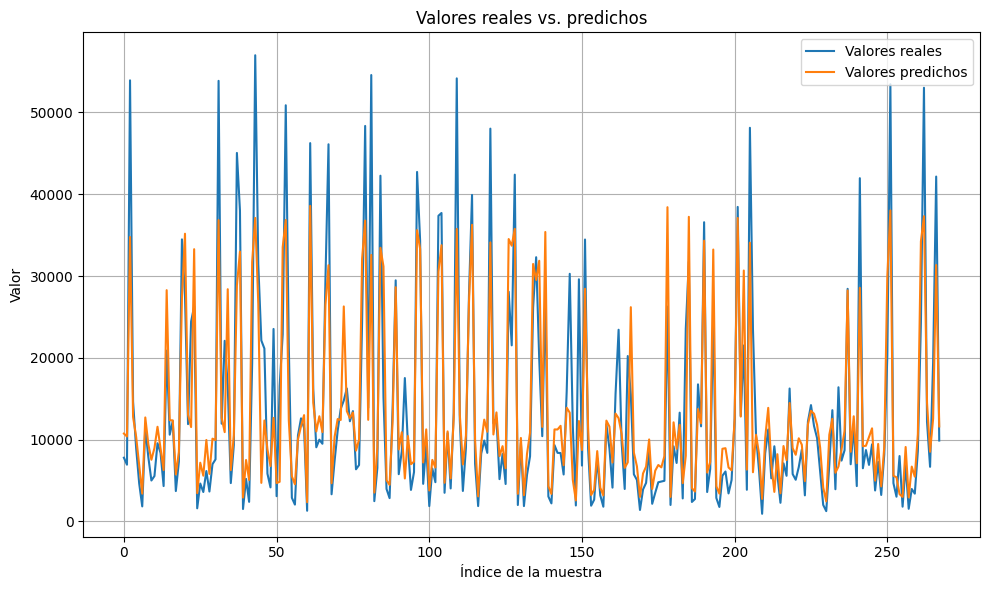

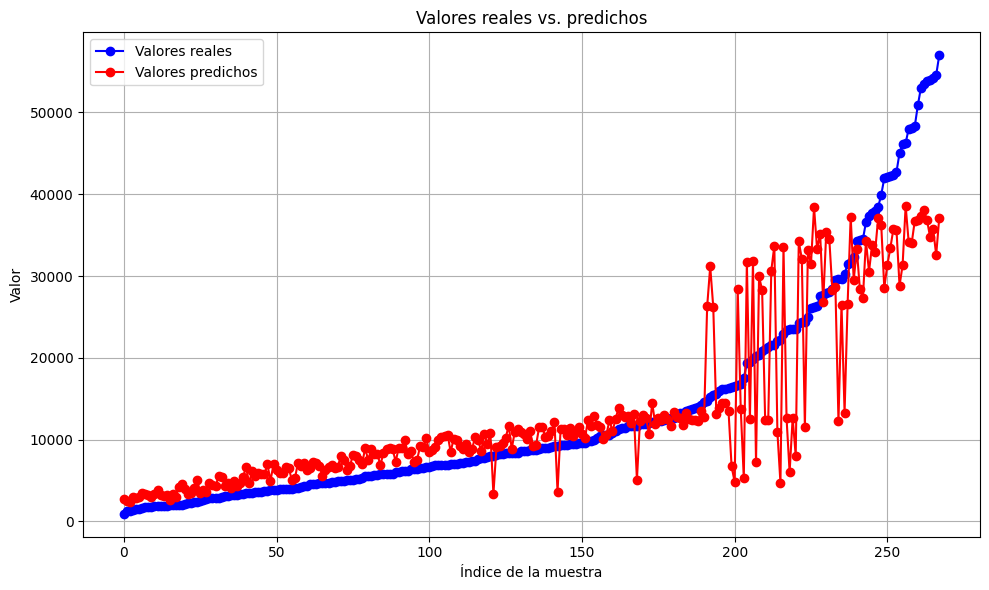

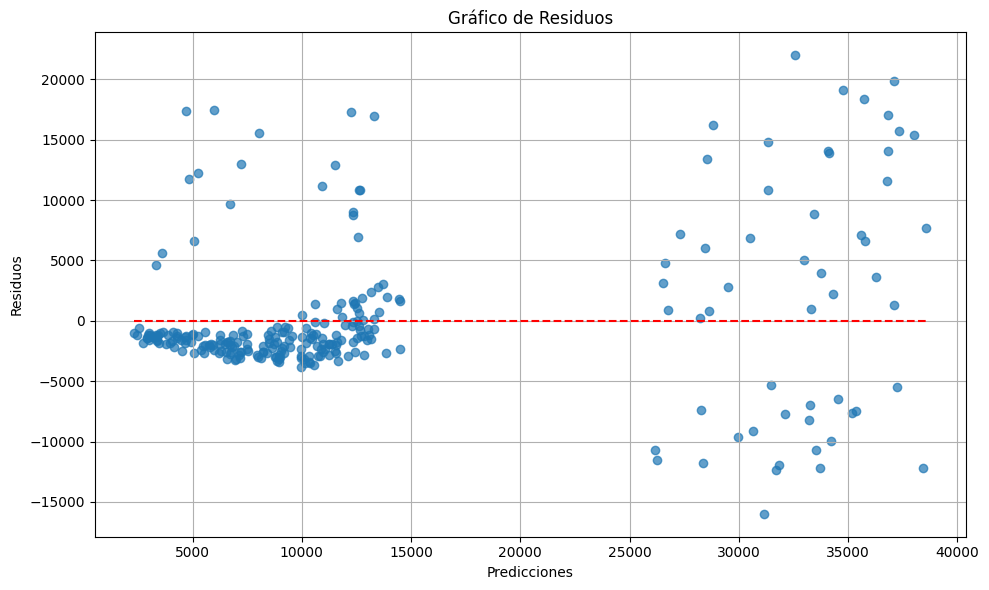

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import identity
from math import sqrt

# Supongamos que la función load_split está definida y carga los datos correctamente
X_train, X_test, y_train, y_test = load_split(0)

# Codificar las variables categóricas con OneHotEncoder
categorical_features = ['Sexo', 'Fumador', 'Region EEUU']
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [col for col in numeric_features if col not in categorical_features]

# Pipeline para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Convertir y_train e y_test a series de pandas para asegurar que no haya problemas de tipo
y_train = y_train.squeeze().astype(float)
y_test = y_test.squeeze().astype(float)

# Convertir y_test a array de NumPy para asegurar la compatibilidad de tipos
y_test = np.array(y_test)

# Añadir una constante para el término de intercepción
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Definir el modelo GLM con la familia Gamma y la función de enlace identidad
# Aplicar preprocesamiento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = GLM(y_train, X_train, family=Gamma(link=identity()))
result = model.fit()

# Imprimir el resumen del modelo
print(result.summary())

# Predicciones en el conjunto de prueba
y_pred = result.predict(X_test)

# Asegurarnos de que y_test y y_pred sean del tipo float
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)

# Calcular MAE, MSE, RMSE, R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Calcular RMSLE (Root Mean Squared Logarithmic Error)
if (y_test >= 0).all() and (y_pred >= 0).all():
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print("RMSLE:", rmsle)
else:
    print("RMSLE: cannot be calculated because some values are negative")

# Calcular MAPE (Mean Absolute Percentage Error)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)
print("MAPE:", mape_score)

# Gráfico de dispersión de los valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs. Predicciones")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de línea de los valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Valores reales")
plt.plot(y_pred, label="Valores predichos")
plt.xlabel("Índice de la muestra")
plt.ylabel("Valor")
plt.title("Valores reales vs. predichos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Crear un array con el índice de las muestras
indices = np.arange(len(y_test))

# Ordenar los valores reales y predichos por los valores reales
sorted_indices = np.argsort(y_test)

# Graficar los valores reales y predichos
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test[sorted_indices], 'b-', marker='o', label='Valores reales')
plt.plot(indices, y_pred[sorted_indices], 'r-', marker='o', label='Valores predichos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valor')
plt.title('Valores reales vs. predichos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar los residuos (errores)
residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid(True)
plt.tight_layout()
plt.show()
